In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder

##Preprocessing

In [ ]:
#akses drive
drive.mount('/content/drive')

# initialize directory path
path = "/content/drive/MyDrive/MSIB/Tugas 3/insurance.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load csv file using pandas
df = pd.read_csv(path)

# data shape (row, columns)
df.shape

(1338, 7)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# one hot encoding for process string type features
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df.iloc[:,:6])

In [ ]:
x = df_encoded
y = df.iloc[:,6:]
print(x.shape)
print(y.shape)

(1338, 609)
(1338, 1)


##Modeling Lineaar Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

print(f"Total train data : {x_train.shape}")
print(f"Total test data : {x_test.shape}")

Total train data : (1070, 609)
Total test data : (268, 609)


In [ ]:
# Buat dan train model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#test
y_pred = model.predict(x_test)

<ipython-input-49-bdf854ef4703>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_data[:, 0], y_test, cmap='viridis', label='Actual Values')
<ipython-input-49-bdf854ef4703>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_data[:, 0], y_pred, cmap='coolwarm', label='Predicted Values')


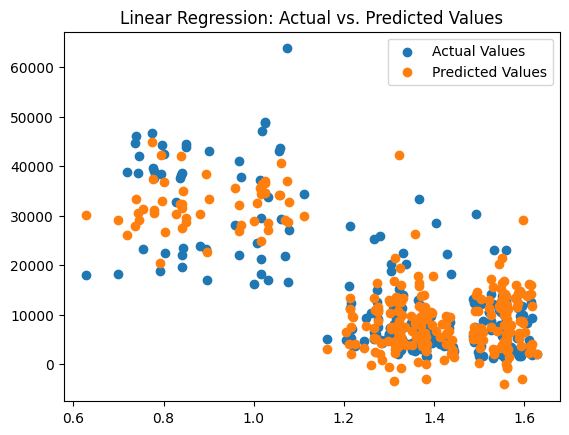

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Create a TruncatedSVD object, specifying the desired number of components (2 for visualization)
svd = TruncatedSVD(n_components=2)

# Fit the TruncatedSVD model to X_test (sparse matrix)
pca_data = svd.fit_transform(x_test)

# Now, pca_data will have the shape (268, 2), containing the projected data onto the first two components

# Plot the scatter plot
plt.scatter(pca_data[:, 0], y_test, cmap='viridis', label='Actual Values')
plt.scatter(pca_data[:, 0], y_pred, cmap='coolwarm', label='Predicted Values')
plt.legend()
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show('Regression: Actual vs. Predicted Values')
plt.show()

##Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Nilai MAE : {mae}")

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Square root of MSE
print(f"Nilai RMSE : {rmse}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Nilai MSE : {mse}")

Nilai MAE : 5312.22545085434
Nilai RMSE : 7503.392469612617
Nilai MSE : 56300898.55303932


##ANN



In [ ]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers

In [ ]:
# load csv file using pandas
df = pd.read_csv(path)

# data shape (row, columns)
df.shape

(1338, 7)

In [ ]:
x = df.iloc[:,:6]
y = df.iloc[:,6:]
print(x.shape)
print(y.shape)

(1338, 6)
(1338, 1)


In [ ]:
encoder = OneHotEncoder(sparse=False)  # Set sparse=False for dense output
x_encoded = encoder.fit_transform(x)
len(x_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1338

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y, test_size=0.2, random_state=42)

print(f"Total train data : {x_train.shape}")
print(f"Total test data : {x_test.shape}")

Total train data : (1070, 609)
Total test data : (268, 609)


In [ ]:
network = models.Sequential()
network.add(layers.Dense(24, activation='relu', input_shape=(609,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [ ]:
# evaluate model
network.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
history = network.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
18/18 [==============================] - 0s 14ms/step - loss: 67646936.0000 - mae: 6222.0576 - val_loss: 88873264.0000 - val_mae: 7036.0327
Epoch 2/150
18/18 [==============================] - 0s 6ms/step - loss: 66899072.0000 - mae: 6199.0547 - val_loss: 88164176.0000 - val_mae: 7006.2676
Epoch 3/150
18/18 [==============================] - 0s 5ms/step - loss: 66170948.0000 - mae: 6175.0781 - val_loss: 87456360.0000 - val_mae: 6980.8950
Epoch 4/150
18/18 [==============================] - 0s 5ms/step - loss: 65434956.0000 - mae: 6143.0806 - val_loss: 86756952.0000 - val_mae: 6945.4990
Epoch 5/150
18/18 [==============================] - 0s 5ms/step - loss: 64715776.0000 - mae: 6098.1299 - val_loss: 86085088.0000 - val_mae: 6899.7002
Epoch 6/150
18/18 [==============================] - 0s 5ms/step - loss: 64036360.0000 - mae: 6048.4551 - val_loss: 85413992.0000 - val_mae: 6859.5220
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 63366272.0000 - mae:

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


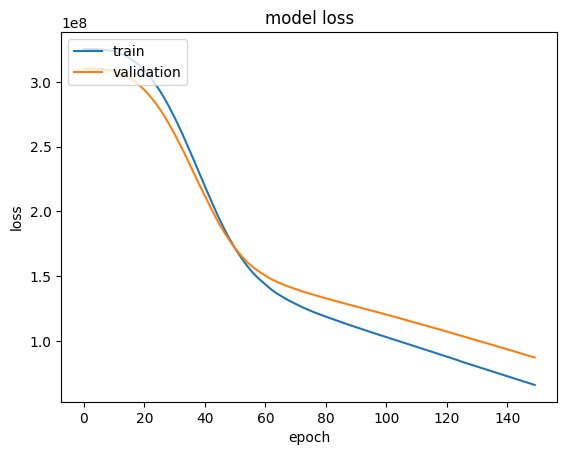

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Keterangan Pengerjaan

Nilai MAE pada ANN semakin membaik dengan epoch yang dilakukan. Algoritma ini dapat terus belajar dan semakin baik tiap kali pelatihan dilakukan. Sedangkan penggunaan Regresi Linear dipilih berdasarkan kesederhanaan guna mempermudah pembelajaran. Meskipun sudah tua, hasil dari evaluasi yang diberikan cukup baik dan tidak terlalu jauh dengan ANN.

